The full form of EDA is Exploratory Data Analysis.

What is EDA?
EDA is an approach in data analysis that:

-->Summarizes the main characteristics of a dataset

-->Helps to understand patterns, spot anomalies, and check assumptions

-->Uses statistical graphics, plots, and data visualization techniques

-->It is often the first step in any data science or machine learning project.

Common EDA Techniques:
-->Descriptive statistics (mean, median, mode, standard deviation)

-->Data visualization (histograms, boxplots, scatter plots)

-->Missing value detection

-->Correlation analysis

-->Outlier detection

About the Iris Dataset:
The Iris dataset contains 150 records with 4 features about 3 species of Iris flowers:

Features (columns):

-->sepal length (cm)

-->sepal width (cm)

-->petal length (cm)

-->petal width (cm)

Target (label):

-->species: Setosa, Versicolor, Virginica



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
iris_data = sns.load_dataset('iris')

In [4]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# What it does:

# Loads the Iris dataset into a pandas DataFrame.

# Why this method:

# sns.load_dataset() directly fetches the dataset, no need to download CSV manually.

print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
# 🤔 Why This Is Useful:
# It gives a summary profile for each species.

# Helps identify which features are most different between species.

# E.g., petal_length clearly increases from Setosa → Versicolor → Virginica.

# This helps you later in feature selection and model training.

iris_data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [7]:
# What it shows:

# Data types, non-null counts, memory usage.

# Why:

# Ensures all features are present and have the right data types (e.g., float, int, object).

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# What it shows:

# Mean, min, max, standard deviation, quartiles for numeric columns.

# Why:

# Provides a statistical overview—e.g., Are all values in the expected range? Any extreme values (outliers)?

iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# What it shows:

# Number of samples of each iris species.

# Why:

# Ensures dataset is balanced. If not, machine learning models may get biased.

pd.value_counts(iris_data['species'])

C:\Users\asus\AppData\Local\Temp\ipykernel_22292\1495405563.py:9: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(iris_data['species'])


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='petal_length', ylabel='Count'>

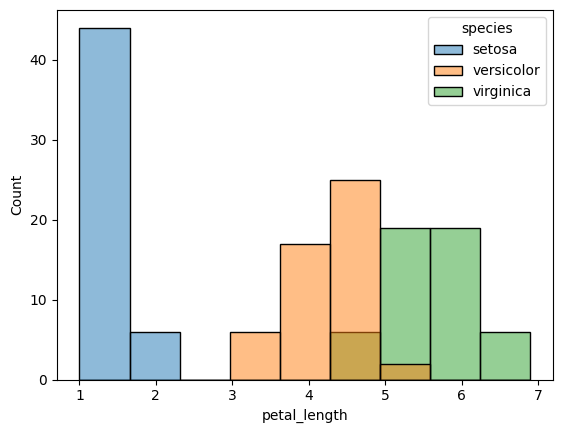

In [10]:
# 📊 What the Graph Shows (Exam-style Explanation):

# The graph displays how the petal_length values are distributed for each species in the Iris dataset.

# Setosa:

# The histogram bars for Setosa (often shown in blue) are concentrated around 1.0 to 1.9 cm.

# This shows Setosa has small petal lengths, and its values do not overlap with other species.

# Versicolor:

# The bars for Versicolor (often orange) are between 3.0 to 5.0 cm.

# These values are larger than Setosa, and partially overlap with Virginica.

# Virginica:

# The Virginica bars (often green) range from 4.5 to 7.0 cm.

# Virginica has the longest petal lengths among the three species.


# ✅ Summary for Exam:
# "The histogram compares the distribution of petal_length for each Iris species. Setosa has 
# distinctly smaller petal lengths (1–2 cm) with no overlap with other species, making it easy
#  to identify. Versicolor and Virginica have larger, overlapping values, indicating moderate to 
# strong separability. This helps in understanding which features are good for classifying flower species."








sns.histplot(iris_data,x='petal_length', hue='species')

In [11]:
iris_data.groupby('species').min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [12]:
iris_data.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


<Axes: xlabel='petal_length', ylabel='Density'>

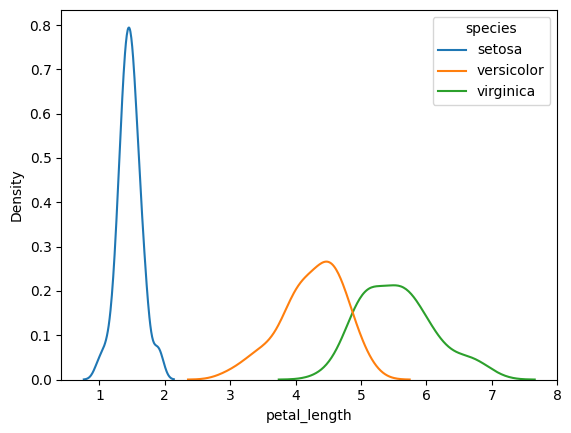

In [13]:

# 📈 What the KDE Plot Shows:
# A KDE (Kernel Density Estimate) plot shows the smoothed probability distribution of a feature. It’s like a smooth version of a histogram.

# -->It estimates how likely you are to find a flower with a particular petal length.

# -->The peak of each curve represents the most common (highest density) value for that species.

# -->The area under the curve adds up to 1 for each species (because it's showing a probability density, not raw counts).


# 📊 Example (Based on Iris Dataset):
# Let’s interpret what you’d typically see:

# -->Setosa (blue): Sharp, narrow peak between 1.0 to 1.9 cm – petal lengths are tightly clustered and don’t overlap with other species.

# -->Versicolor (orange): Broader peak in 3.5 to 5.0 cm.

# -->Virginica (green): Peak around 5.0 to 6.5 cm.

# 👉 So the KDE plot shows how petal_length values are distributed per species — and more importantly, how much they overlap.


# Why KDE is Useful in Iris Dataset:
# -->Clearly shows that Setosa's petal lengths are well-separated from the other species.

# -->You can observe overlap between Versicolor and Virginica, which means they may be harder to separate using petal_length alone.

# -->Ideal for feature analysis and choosing what variables are useful for classification.

sns.kdeplot(iris_data,x='petal_length',hue = 'species')

<Axes: xlabel='sepal_width', ylabel='Density'>

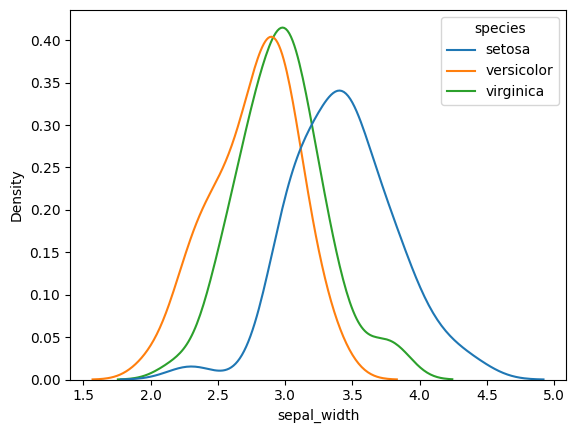

In [14]:
sns.kdeplot(iris_data,x='sepal_width',hue = 'species')

<Axes: xlabel='petal_length', ylabel='Density'>

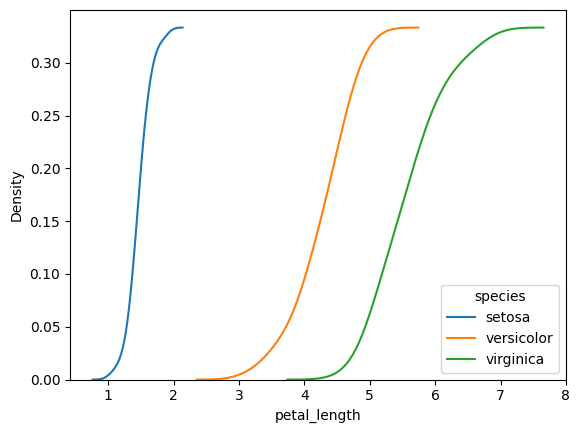

In [15]:
# ✅ What This Code Does:
# Plots cumulative distribution curves (CDFs) of petal_length for each Iris species.

# Uses KDE (Kernel Density Estimation) to calculate a smooth cumulative probability.

# Each curve rises from 0 to 1 on the Y-axis (since the total cumulative probability is 1).

# 📈 What Is a Cumulative KDE Plot?
# A cumulative KDE plot shows the running total of probability as you move from left to right along the x-axis (petal_length).

# It answers the question:

# “What percentage of flowers have petal_length ≤ x?”

# For each species:

# Y-axis tells you the proportion of flowers whose petal length is less than or equal to the current x-axis value.

# 📊 Example (from Iris dataset):
# Let’s say on the plot:

# At x = 2 cm:

# Setosa's curve is at ~1.0 → ~100% of Setosa flowers have petal_length ≤ 2 cm.

# Versicolor's curve is at 0.0 → 0% have petal_length ≤ 2 cm.

# At x = 5 cm:

# Setosa: Still at 1.0 (no more change)

# Versicolor: ~0.9 → 90% of Versicolor flowers have petal_length ≤ 5 cm

# Virginica: ~0.3 → Only 30% of Virginica flowers have petal_length ≤ 5 cm




sns.kdeplot(iris_data,x='petal_length',hue = 'species',cumulative=True)

<Axes: xlabel='petal_width', ylabel='Density'>

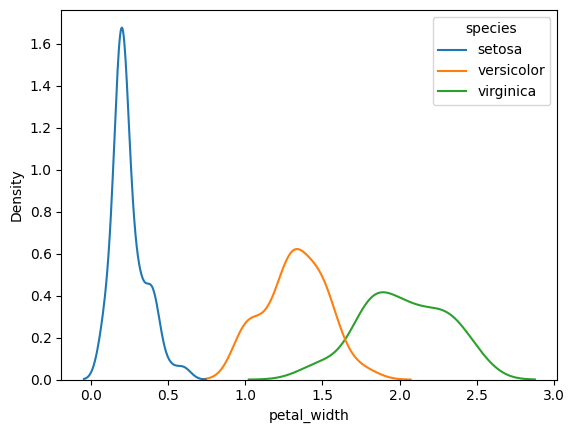

In [16]:
sns.kdeplot(iris_data,x='petal_width',hue = 'species')

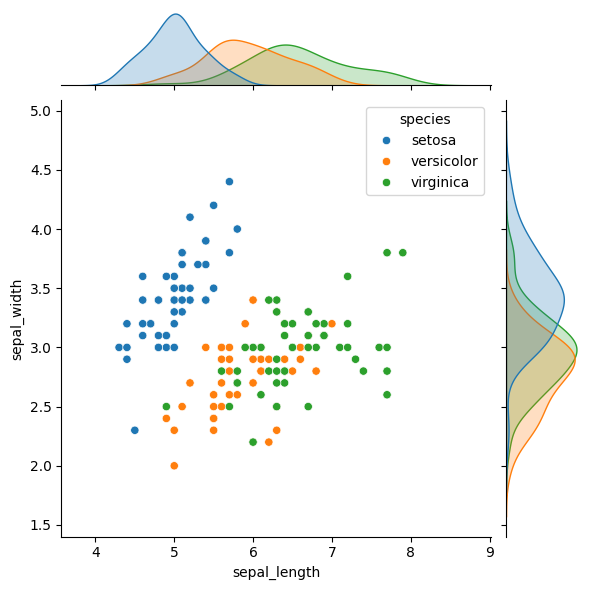

In [ ]:

# 📊 What the Plot Shows
# A jointplot gives both the relationship between
# two features and their individual distributions, separated by species.


# 🧠 Interpretation (using Iris dataset)
# Let’s interpret the jointplot:

# Setosa:

# -->Appears in the upper-left corner (short sepal length, wide sepal width)

# -->Its distribution is separated clearly from the other two — shows it’s easily classifiable

# Versicolor:

# -->Located in the middle

# -->Has overlap with both Setosa and Virginica

# Virginica:

# -->In the lower-right region (longer sepals, narrower width)

# -->More overlap with Versicolor


sns.jointplot(iris_data,x = 'sepal_length',y='sepal_width',hue = 'species')


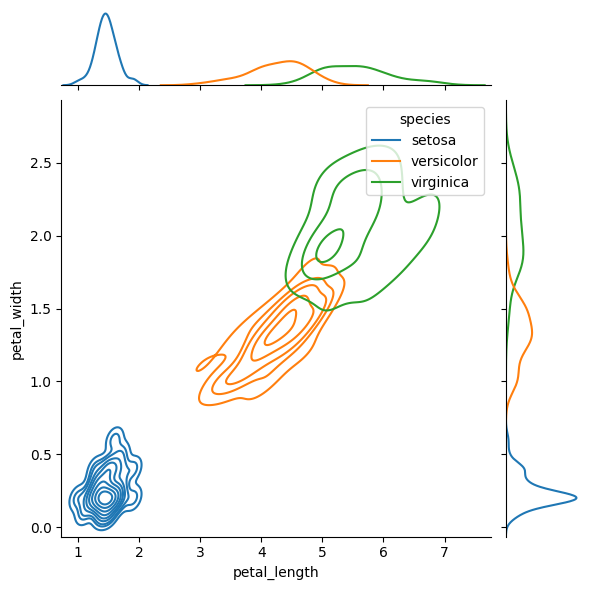

In [18]:
sns.jointplot(iris_data,x = 'petal_length',y='petal_width',hue = 'species',kind='kde')

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
import pandas as pd

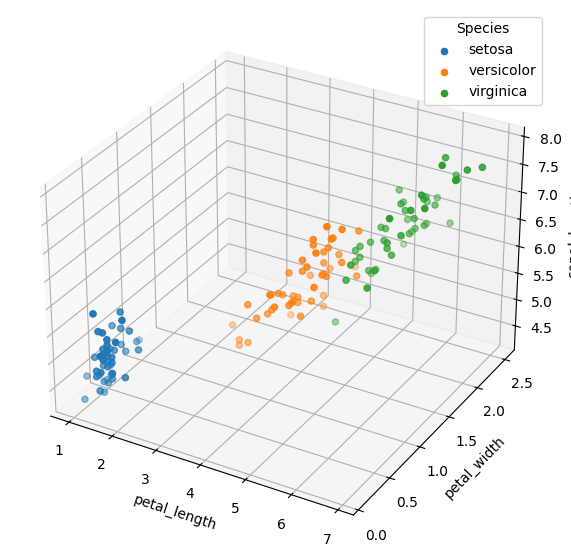

In [21]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data points for each species
for species_name in np.unique(iris_data['species']):
    subset = iris_data[iris_data['species'] == species_name]
    ax.scatter(
        subset['petal_length'],
        subset['petal_width'],
        subset['sepal_length'],
        label=species_name
    )

# Label the axes
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('sepal_length')

# Add a legend
ax.legend(title="Species")

# Show the plot
plt.show()


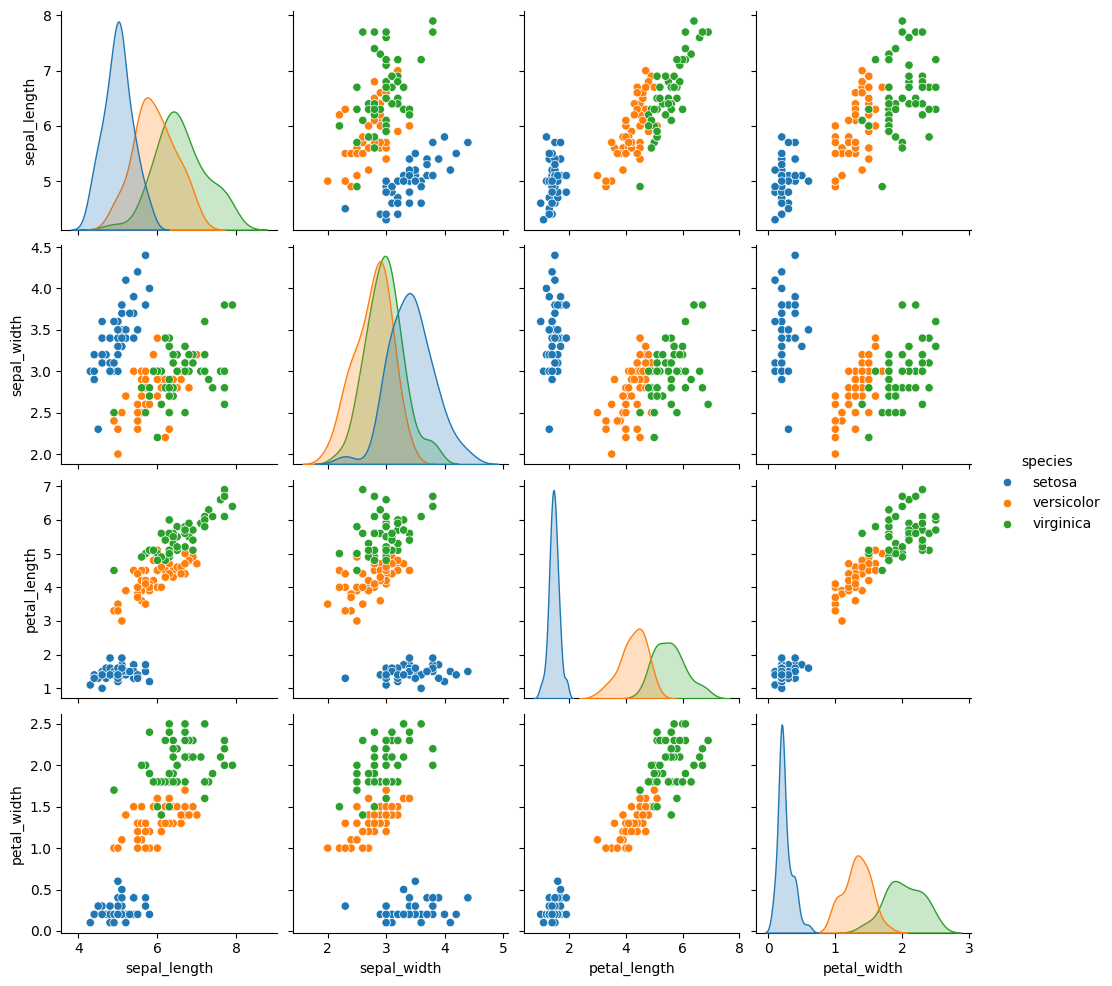

In [ ]:
# 📈 What the Pairplot Shows:
# A pairplot is a multivariate visualization tool that shows:

# Scatter plots for every pair of features (e.g., sepal length vs petal length)

# Histograms or KDEs for individual features along the diagonal

# Color-coded grouping based on hue (species)

# 🔍 Example from Iris Dataset
# There are 4 features:

# sepal_length

# sepal_width

# petal_length

# petal_width

# So the pairplot will show a 4 × 4 grid:

# Feature ↓ / →	Sepal Length	Sepal Width	Petal Length	Petal Width
# Sepal Length	hist/KDE	scatter	scatter	scatter
# Sepal Width	scatter	hist/KDE	scatter	scatter
# Petal Length	scatter	scatter	hist/KDE	scatter
# Petal Width	scatter	scatter	scatter	hist/KDE

# 🧠 How to Interpret the Pairplot (Iris)
# ✅ Class Separation:
# Petal length and petal width clearly separate Setosa from the other two species — you'll see the blue dots in a different region.

# Versicolor and Virginica may overlap slightly in petal-related features but are still somewhat separable.

# Sepal width offers less separation between species — points may be more mixed.

# ✅ Distribution (diagonal plots):
# Histograms/KDEs show how each feature is distributed per species.

# Useful to check:

# Which features are skewed

# Where values cluster











sns.pairplot(iris_data,hue = 'species')

In [23]:
iris_data.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

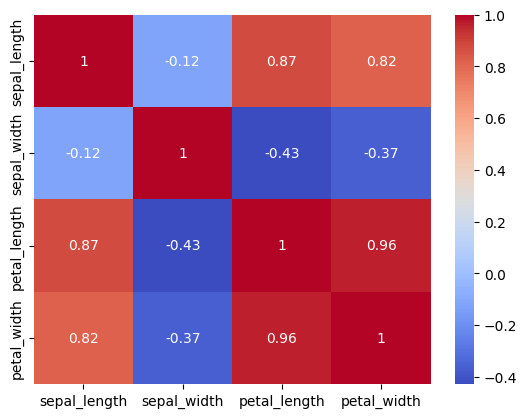

In [26]:
# ✅ What the Code Does:
# 🔹 iris_data.corr(numeric_only=True)
# -->Calculates the correlation matrix for all numeric columns in the Iris dataset.

# -->Measures how strongly each pair of features is related (on a scale of -1 to +1).

# 📈 What the Heatmap Shows (Iris Example):
# Assuming your dataset has the usual 4 features:

# sepal_length

# sepal_width

# petal_length

# petal_width

# The heatmap will look like this:

#                 Sepal Length	   Sepal Width 	  Petal Length	  Petal Width
# Sepal Length	       1.0	        -0.12	          0.87	         0.82
# Sepal Width	      -0.12	          1.0	          -0.43	         -0.37
# Petal Length	       0.87	         -0.43	           1.0	          0.96
# Petal Width	       0.82	         -0.37	           0.96         	1.0

# 🧠 How to Interpret:
# ✅ High positive correlation (close to +1):

# petal_length and petal_width: 0.96 → strongly related.

# Meaning: As petal length increases, petal width also increases.

# ❌ Low or negative correlation:

# sepal_width and petal_length: -0.43 → mildly negative relation.

# sepal_length and sepal_width: -0.12 → very weak negative relation.


sns.heatmap(iris_data.corr(numeric_only = True),annot=True, cmap='coolwarm')

<Axes: xlabel='species', ylabel='petal_width'>

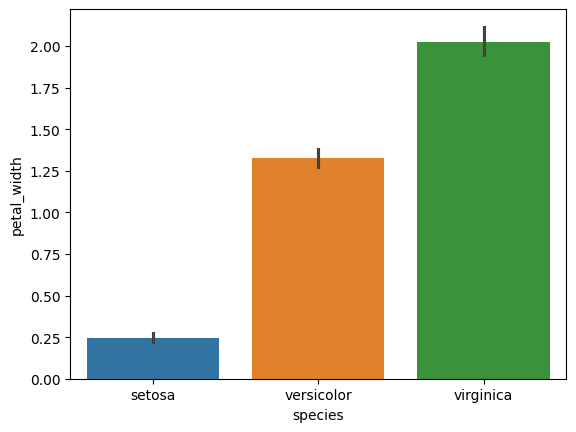

In [27]:
sns.barplot(iris_data, x = 'species', y = 'petal_width', hue='species')

# species 'virginica' has high petal length as compared to other species

🧠 Final Conclusion:
The exploratory data analysis clearly reveals that the petal dimensions (length and width) are the most informative features for distinguishing between the three Iris species. Setosa is easily separable from the other two, while Versicolor and Virginica show partial overlap. These insights will guide effective feature selection and improve the performance of classification models built on this dataset.